In [1]:
date()

[1] "Sat Oct  1 16:46:19 2016"

In [2]:
sapply(c("pipeR", "dplyr", "tidyr", "ggplot2", "Cairo", "readr", "readxl", "openxlsx"), require, character.only = TRUE)

Loading required package: pipeR
Warning message:
“package ‘pipeR’ was built under R version 3.2.4”Loading required package: dplyr

Attaching package: ‘dplyr’

 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 

 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: Cairo
Loading required package: readr
Loading required package: readxl
Warning message:
“package ‘readxl’ was built under R version 3.2.4”Loading required package: openxlsx


pipeR    dplyr    tidyr  ggplot2    Cairo    readr   readxl openxlsx 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

In [3]:
options(repr.plot.width = 4, repr.plot.height = 4)

# Chapter 2 統計の基礎
## 2.1 尺度水準

* 名義尺度
* 順序尺度
* 間隔尺度
* 比例尺度・比率尺度

## 代表値

* 平均値 $\bar{X}$ （算術平均）

In [4]:
X <- c(0, 7, 8, 9, 100)
mean(X)

[1] 24.8

* NA: 欠損値
* NaN: Not a Number

In [5]:
Y <- c(0, 7, 8, NA, 0/0)
Y

[1]   0   7   8  NA NaN

In [6]:
mean(Y)

[1] NA

`na.rm = TRUE` は NaN も消す

In [7]:
mean(Y, na.rm = TRUE)

[1] 5

* 幾何平均
* トリム平均

20%除去

In [8]:
mean(X, trim = 0.2)

[1] 8

In [9]:
mean(X[2:4])

[1] 8

* 中央値

In [10]:
median(X)

[1] 8

* ウィンザライズド平均
* ミッドレンジ

## 2.3 確率変数，乱数，母集団，標本

* 分散，母分散

$$\sigma^2 = V(X) = E((X - \mu)^2), \mu = E(X)$$

* 標準偏差

$$\sigma = \sqrt{E((X - \mu)^2}$$

確率変数$X$，$Y$が独立なら，和の分散は分散の和なので，

$$ \sigma^2_{X \pm Y} = \sigma^2_X + \sigma^2_Y $$

標本分散は $n-1$ で割る

$$\frac{1}{n-1}\sum\limits^n_{ti = 1}(X_i - \bar{X})^2$$

In [11]:
x <- 1:5
var(x)

[1] 2.5

どれか一つを外して分散を出す

In [12]:
apply(combn(c(1:5), 4), 2, var)

[1] 1.666667 2.916667 3.333333 2.916667 1.666667

平均は元の分散と一致

In [13]:
apply(combn(c(1:5), 4), 2, var) %>>% mean()

[1] 2.5

$n$ で割る分散

In [14]:
varp <- function(x){var(x) * (length(x) - 1) / length(x)}

In [15]:
varp(x)

[1] 2

In [16]:
var(x)

[1] 2.5

* 標準偏差

In [17]:
x <- 1:10
sd(x)

[1] 3.02765

* 四分位範囲（IQR），五数要約

In [18]:
x <- 1:9
IQR(x)

[1] 4

In [19]:
quantile(x)

0%  25%  50%  75% 100% 
   1    3    5    7    9

In [20]:
fivenum(x)

[1] 1 3 5 7 9

In [21]:
y <- c(1, 2, 4, 8, 16, 32)
IQR(y)

[1] 11.5

In [22]:
quantile(y)

0%  25%  50%  75% 100% 
 1.0  2.5  6.0 14.0 32.0

In [23]:
fivenum(y)

[1]  1  2  6 16 32

## 2.5 中心極限定理と正規分布

In [24]:
runif(1)

[1] 0.6943885

In [25]:
runif(10)

[1] 0.05995227 0.14177156 0.12507683 0.34118830 0.72963991 0.93526372
 [7] 0.16284847 0.99726180 0.45871554 0.90644680

0.5引いて範囲を $-0.5 \leq x \leq 0.5$ に

分散は，

$$\int^{0.5}_{0.5} x^2dx = \frac{1}{12}$$

なので，12個足すと1になる

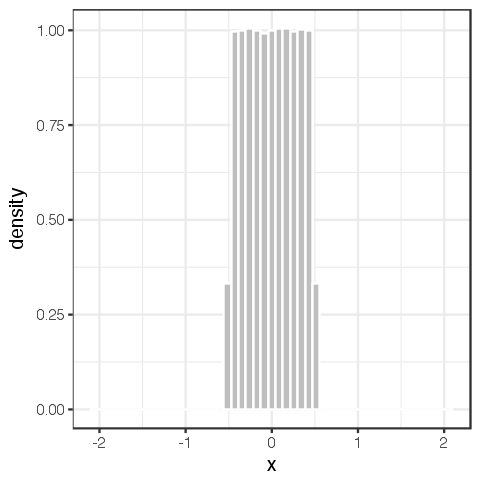

In [26]:
X <- runif(1000000) - 0.5
data.frame(x = X) %>>% 
    ggplot(aes(x = x, y = ..density..)) + 
        geom_histogram(bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-2.1, 2.1))

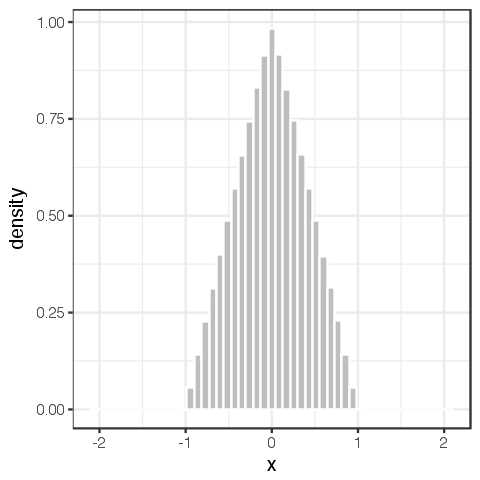

In [27]:
X <- (runif(1000000) - 0.5) + (runif(1000000) - 0.5)
data.frame(x = X) %>>% 
    ggplot(aes(x = x, y = ..density..)) + 
        geom_histogram(bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-2.1, 2.1))

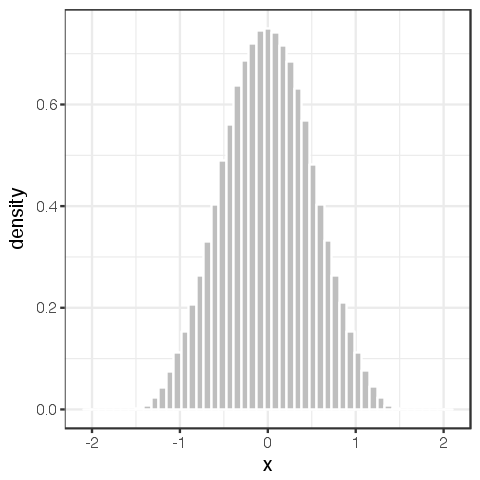

In [28]:
X <- (runif(1000000) - 0.5) + (runif(1000000) - 0.5) + (runif(1000000) - 0.5)
data.frame(x = X) %>>% 
    ggplot(aes(x = x, y = ..density..)) + 
        geom_histogram(bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-2.1, 2.1))

In [29]:
c(1:12) %>>% 
    lapply(function(x){
        runif(10) - 0.5}
    ) %>>% 
    {do.call(rbind, (.))} %>>%
    apply(2, sum)

[1]  0.49026178 -0.45869783  0.17544888  0.31535177  0.12853076  0.79895395
 [7] -1.33212954 -0.13730856  1.43822301 -0.06897214

In [30]:
X <- c(1:12) %>>% 
        lapply(function(x){
            runif(1000000) - 0.5}
        ) %>>% 
        {do.call(rbind, (.))} %>>%
        apply(2, sum)

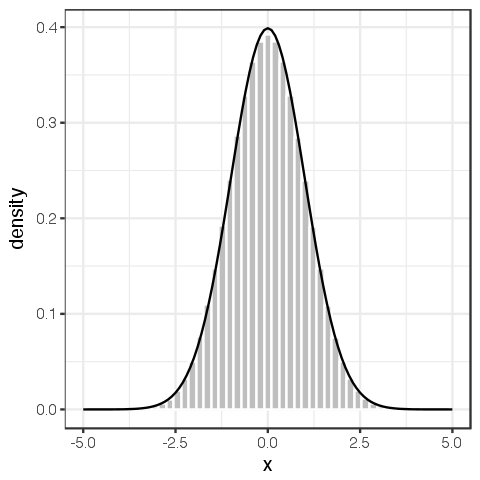

In [31]:
data.frame(x = X) %>>% 
    ggplot(aes(x)) + 
        geom_histogram(aes(y = ..density..), bins = 50, fill = "gray", colour = "white") + 
        theme_bw() + 
        scale_x_continuous(limits = c(-5, 5)) + 
        stat_function(fun = dnorm)

* 標準正規分布

$$ f(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right) $$

$-\infty$ から $\infty$ まで積分すると1になる

正規分布の確率密度関数: `dnorm(x, mean = 0, sd = 1)`

In [32]:
dnorm(1)

[1] 0.2419707

In [33]:
(1 / sqrt(2 * pi)) * exp(-1^2 / 2)

[1] 0.2419707

$$\int^{\infty}_{-\infty} -\frac{x^2}{2}dx$$

In [34]:
integrate(function(x){exp(-x^2/2)}, -Inf, Inf)

2.506628 with absolute error < 0.00023

In [35]:
sqrt(2 * pi)

[1] 2.506628

中心極限定理

平均 $\mu$， 分散 $\sigma^2$の確率変数$X$から取り出した数の平均値$\bar{X}$

$$\bar{X} = \frac{X_1 + X_2 + \ldots + X_n}{n}$$

の分布は，平均$\mu$，分散$\sigma^2/n$なので

$$ \frac{\bar{X} - \mu}{\sqrt{\sigma^$/n}} $$

の分布は平均 0 分散 1になる．
nが十分大きくなると標準正規分布に近づく．

確率分布に関するRの関数: dxx, pxx, qxx, rxx

正規分布の場合は，

* 密度関数: `dnorm(x)`
* 分布関数: `pnorm(q)` = $\int^q_{-\infty}\mathrm{dnorm}(x)dx$
* 分位関数: `qnorm(p)`
* 乱数発生: `rnorm(n)`

正規分布$\mathcal{N}(\mu, \sigma^2)$ に従う$X$が $\mu - \sigma \lt X \lt \mu + \sigma$ に入る確率

$\mathcal{N}(0, 1)$ に従う$Z$が $-1 \lt Z \lt 1$ に入る確率に等しい

In [36]:
pnorm(1) - pnorm(-1)

[1] 0.6826895

In [37]:
1 - 2 * pnorm(-1)

[1] 0.6826895

2$\sigma$

In [38]:
1 - 2 * pnorm(-2)

[1] 0.9544997

3$\sigma$

In [39]:
1 - 2 * pnorm(-3)

[1] 0.9973002

95%

In [40]:
qnorm(0.95)

[1] 1.644854

99%

In [41]:
qnorm(0.99)

[1] 2.326348

* テストの分布

In [42]:
x <- read_csv("data/rika_hist.csv")
str(x)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	26 obs. of  2 variables:
 $ 正答数: int  0 1 2 3 4 5 6 7 8 9 ...
 $ 生徒数: int  2247 4449 10774 19983 29385 37881 44207 48518 51221 53379 ...


In [43]:
names(x) <- c("correct", "student")

平均

In [44]:
rep(x$correct, x$student) %>>% mean()

[1] 13.36785

標準偏差

In [45]:
rep(x$correct, x$student) %>>% sd()

[1] 5.739281

pdf 
  2

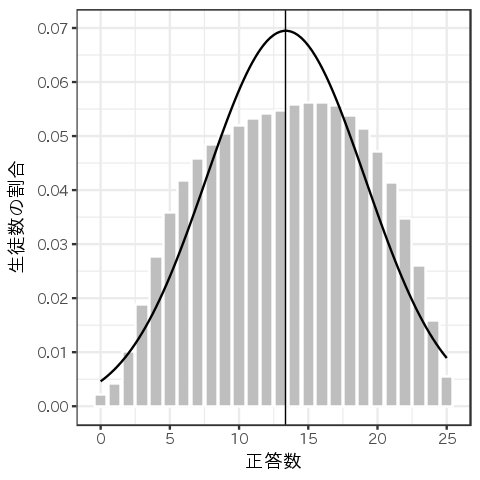

In [46]:
Cairo(type = "raster")
CairoFonts(regular = "IPAexGothic")
x %>>% ggplot(aes(x = correct, y = student / sum(student))) + 
    geom_bar(stat="identity", colour = "white", fill = "gray") + 
    theme_bw() + 
    scale_x_continuous(breaks = seq(0, 25, 5)) +
    scale_y_continuous(limits = c(0, 0.07), breaks = seq(0, 0.07, 0.01)) + 
    stat_function(fun = dnorm, args = list(mean = 13.37, sd = 5.74)) + 
    geom_vline(xintercept = 13.37, size = 0.3) + 
    xlab("正答数") + 
    ylab("生徒数の割合")
dev.off()

## 2.6 コーシー分布

* 中心極限定理の前提を満たさない
* 密度関数が$1/(1 + ax^2)$ に比例

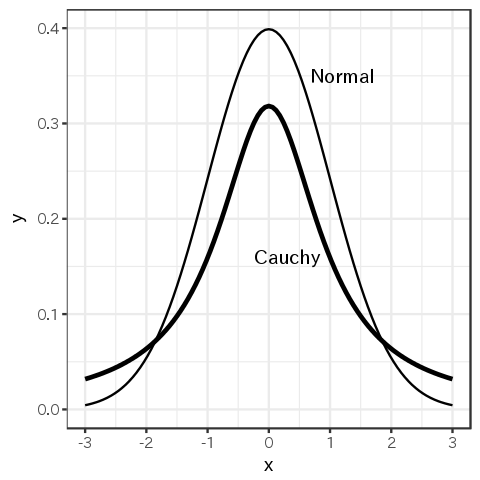

In [47]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) + 
    stat_function(fun = dnorm) + 
    annotate(label = "Normal", geom = "text", x = 1.2, y = 0.35) + 
    stat_function(fun = dcauchy, size = 1) + 
    annotate(label = "Cauchy", geom = "text", x = 0.3, y = 0.16) + 
    scale_x_continuous(breaks = seq(-3, 3, 1)) + 
    scale_y_continuous(limits = c(0, 0.4)) + 
    theme_bw()

In [48]:
x <- rcauchy(1000000)

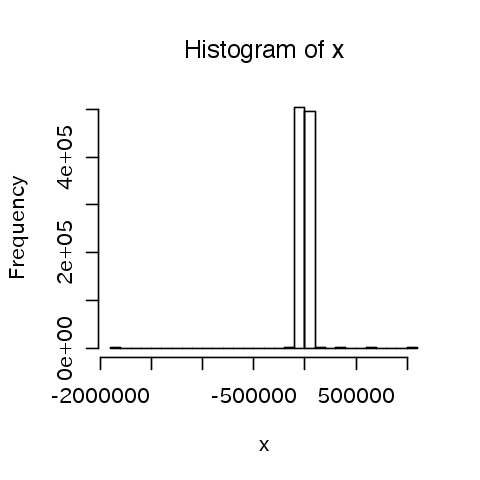

In [49]:
hist(x)

In [50]:
sort(x) %>>% head()

[1] -1849973.68  -150069.22  -122888.14   -78287.27   -73159.45   -55626.42

In [51]:
mean(x)

[1] 0.05320763

In [52]:
sd(x)

[1] 2300.34

## 2.7 正規分布から導かれる分布
### カイ二乗分布

自由度$v$のカイ二乗分布

$X$ は $\mathcal{N}(0, 1)$ に従う

$$\chi^2 = X_1^2 + X_2^2 + \ldots + X_v^2$$

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


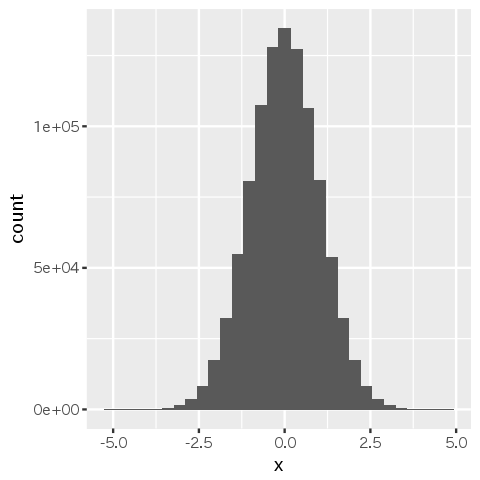

In [53]:
ggplot(data.frame(x = rnorm(1000000)), aes(x)) + 
    geom_histogram()

* 自由度1のカイ二乗分布

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4753 rows containing non-finite values (stat_bin).”

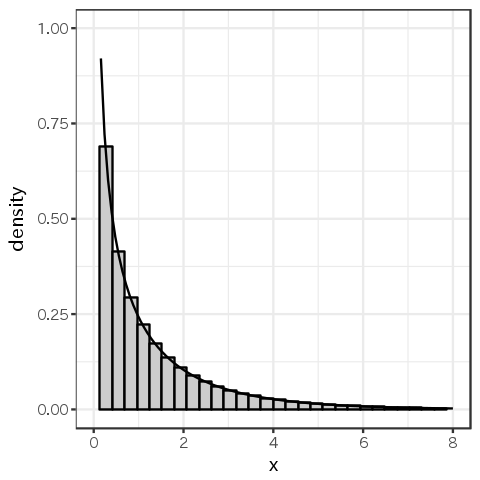

In [54]:
ggplot(data.frame(x = rnorm(1000000)^2), aes(x)) + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = gray(0.8)) + 
    stat_function(fun = dchisq, args = list(df = 1)) + 
    theme_bw() + 
    scale_x_continuous(limits = c(0, 8)) + 
    scale_y_continuous(limits = c(0, 1))

* 自由度2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 18315 rows containing non-finite values (stat_bin).”

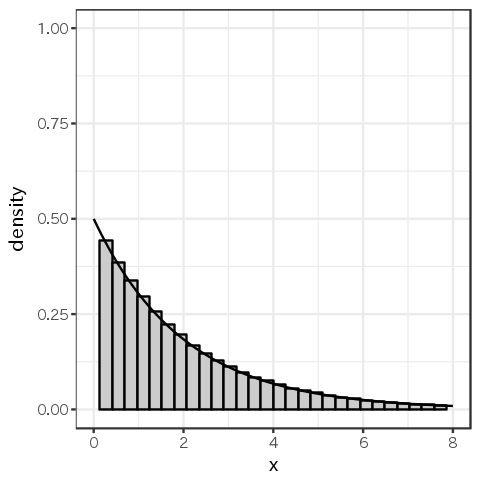

In [55]:
ggplot(data.frame(x = rnorm(1000000)^2 + rnorm(1000000)^2), aes(x)) + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = gray(0.8)) + 
    stat_function(fun = dchisq, args = list(df = 2)) + 
    theme_bw() + 
    scale_x_continuous(limits = c(0, 8)) + 
    scale_y_continuous(limits = c(0, 1))

### $t$ 分布

$X$ が $\mathcal{N}(0, 1)$，$Y$が自由度$v$の$\chi^2$分布に従うとき自由度$v$の$t$分布は，

$$ t = \frac{X}{\sqrt{Y / v}} $$

In [56]:
fun.t <- function(x){
    (mean(x)-0.5)/(sd(x)/sqrt(12))
}
t <- c(1:12) %>>% 
    lapply(function(x){runif(1000000)}) %>>% 
    {do.call(rbind, (.))} %>>%
    apply(2, fun.t)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1134 rows containing non-finite values (stat_bin).”

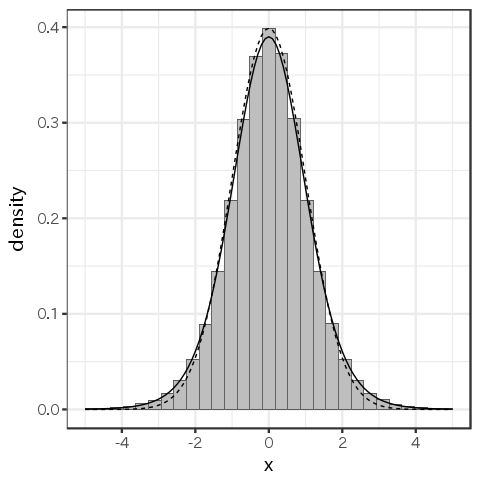

In [57]:
ggplot(data.frame(x = t), aes(x)) + 
    geom_histogram(aes(y = ..density..), colour = "black", fill = "gray", size = 0.1) + 
    theme_bw() + 
    scale_x_continuous(breaks =seq(-4, 4, 2), limits = c(-5, 5)) + 
    stat_function(fun = dnorm, size = 0.3, linetype = 2) + 
    stat_function(fun = dt, args = list(df = 11), size = 0.3)

### $F$ 分布
$u$ は 自由度$v$ の$\chi^2$分布に従う

$$ F = \frac{u_1 / v_1}{u_2 / v_2} $$

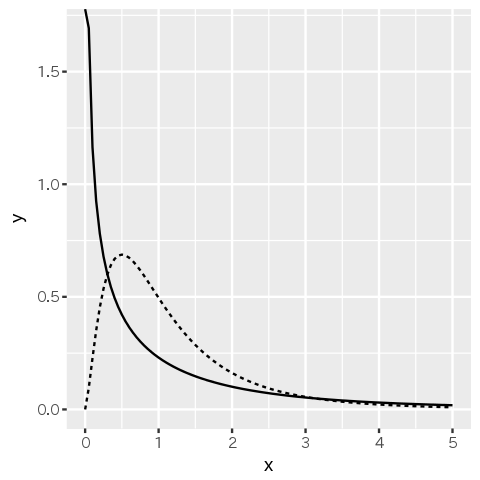

In [58]:
ggplot(data.frame(x = c(0, 5)), aes(x)) + 
    stat_function(fun = df, args = list(df1 = 1, df2 = 10)) + 
    stat_function(fun = df, args = list(df1 = 5, df2 = 10), linetype = 2) 

In [59]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, darwin13.4.0        
 ui       X11                         
 language (EN)                        
 collate  ja_JP.UTF-8                 
 tz       Asia/Tokyo                  
 date     2016-10-01                  

 package    * version    date       source                            
 assertthat   0.1        2013-12-06 CRAN (R 3.2.0)                    
 Cairo      * 1.5-9      2015-09-26 CRAN (R 3.2.0)                    
 colorspace   1.2-6      2015-03-11 CRAN (R 3.2.0)                    
 crayon       1.3.2      2016-06-28 CRAN (R 3.2.5)                    
 DBI          0.4-1      2016-05-08 CRAN (R 3.2.5)                    
 devtools     1.12.0     2016-06-24 CRAN (R 3.2.5)                    
 digest       0.6.10     2016-08-02 CRAN (R 3.2.5)                    
 dplyr      * 0.4.3      2015-09-01 CRAN (R 3.2.0)                    
 evaluate     0.9        2016-04-29 CRAN (R 3.2.